In [14]:
import json

with open(r'D:\ggit\abcd\hw4_data.json', 'r') as f:
    data = json.load(f)

nodes = data['nodes']
edges = data['edges']


In [15]:
import networkx as nx

G = nx.Graph()

for node in nodes:
    G.add_node(node[0], influence=node[1])

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])


In [16]:
friends = {node: list(G.neighbors(node)) for node in G.nodes}

degree_dict = dict(G.degree())
top_degree_users = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

influence_scores = {node: G.nodes[node]['influence'] for node in G.nodes}
top_influential_users = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]

combined_scores = {node: 0.5 * influence_scores[node] + 0.5 * degree_dict[node] for node in G.nodes}
top_combined = sorted(combined_scores.items(), key=lambda x: x[1], reverse=True)[:5]


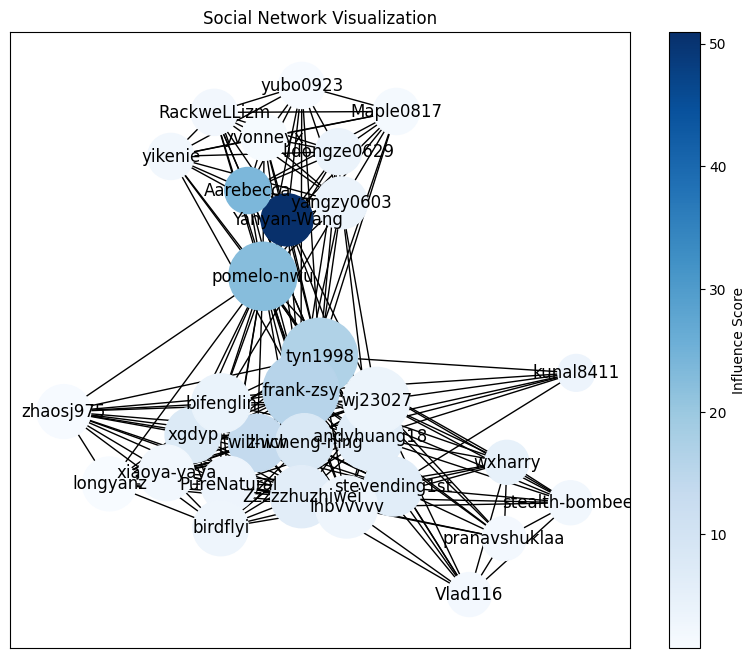

In [17]:
import matplotlib.pyplot as plt

#节点
node_color = [influence_scores[node] for node in G.nodes]
node_size = [degree_dict[node] * 100 for node in G.nodes]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.Blues)
edges = nx.draw_networkx_edges(G, pos)
labels = nx.draw_networkx_labels(G, pos)

#颜色条
plt.colorbar(nodes, label='Influence Score')
plt.title("Social Network Visualization")
plt.show()

